#IMPORT ALL LIBRARY ACCORDING TO NEEDS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("Stress-Lysis.csv")
df.head(5)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [ ]:
df = pd.get_dummies(df)
df.head(5)


,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


#EBA :- Exploratory Data Analysis

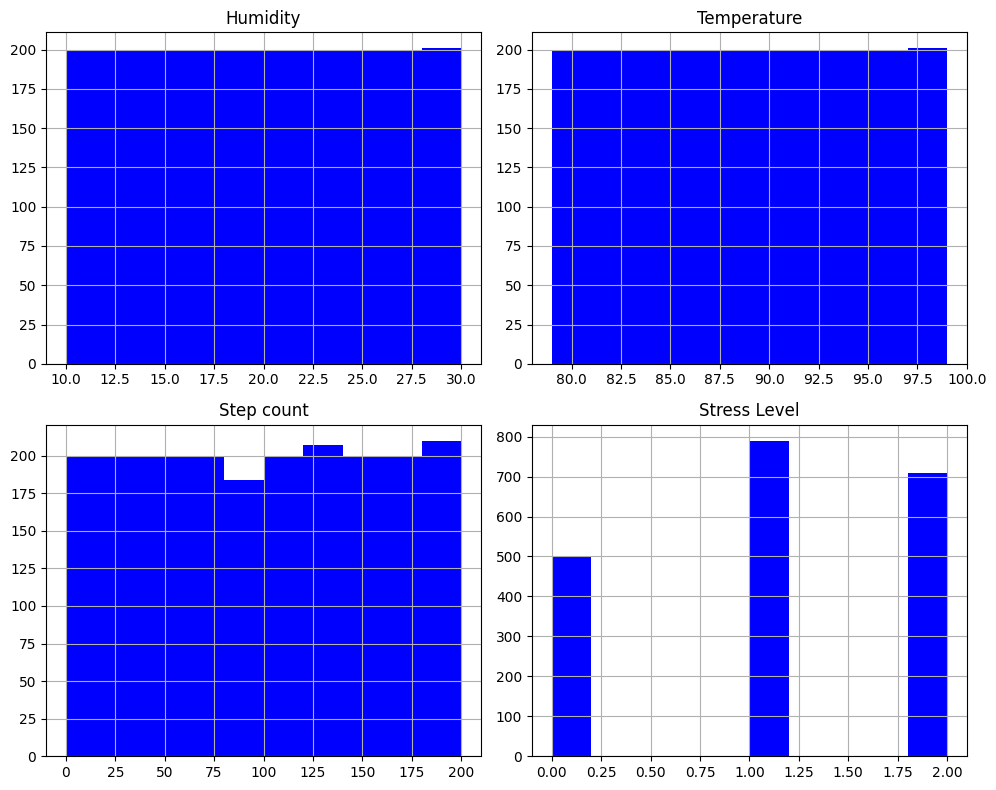

In [ ]:
numeric = df.select_dtypes(include=[np.number])
numeric.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

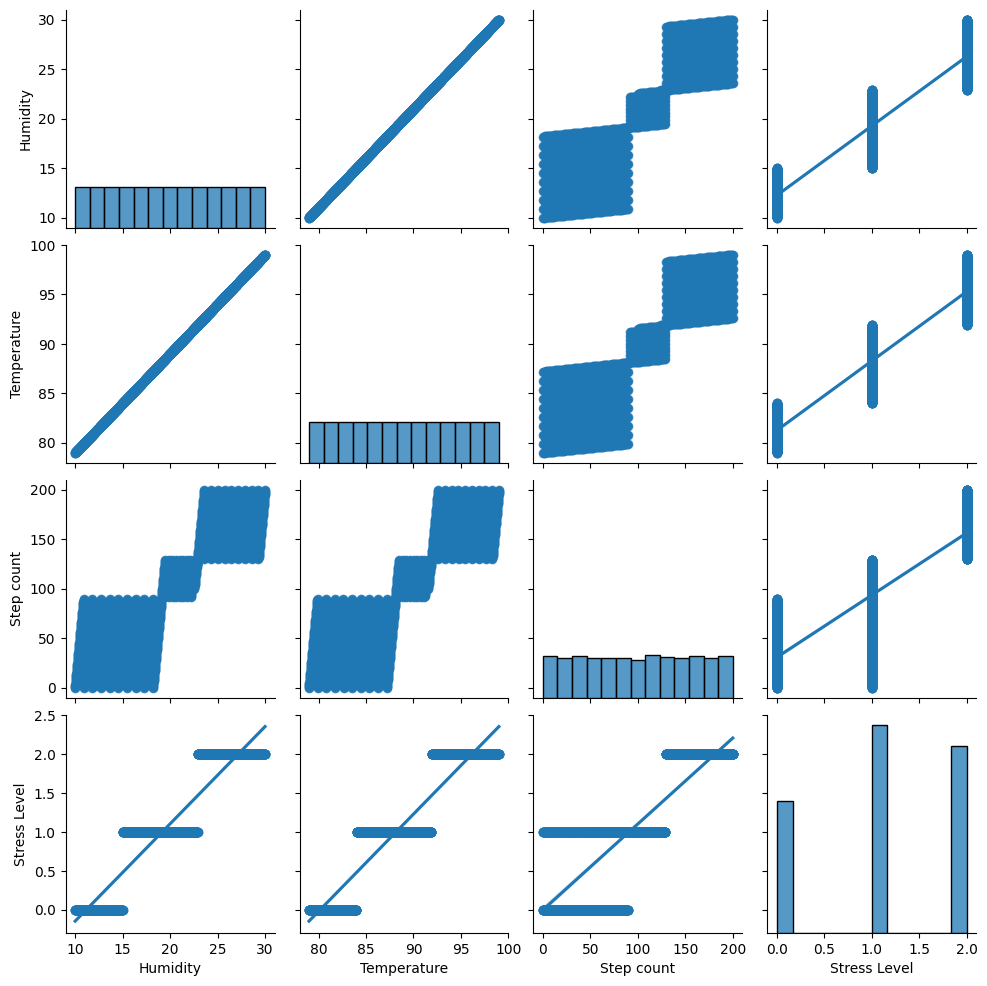

In [ ]:
sns.pairplot(numeric,kind = 'reg')
plt.show

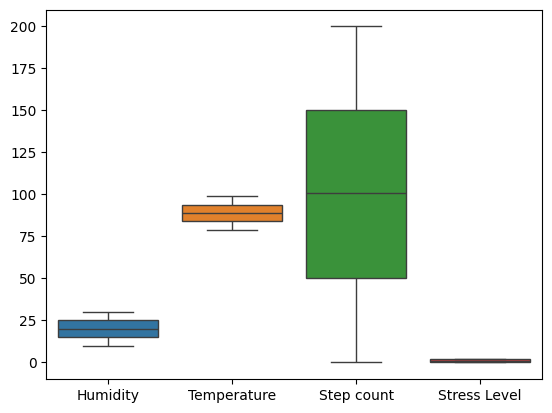

In [ ]:
sns.boxplot(numeric)
plt.show()

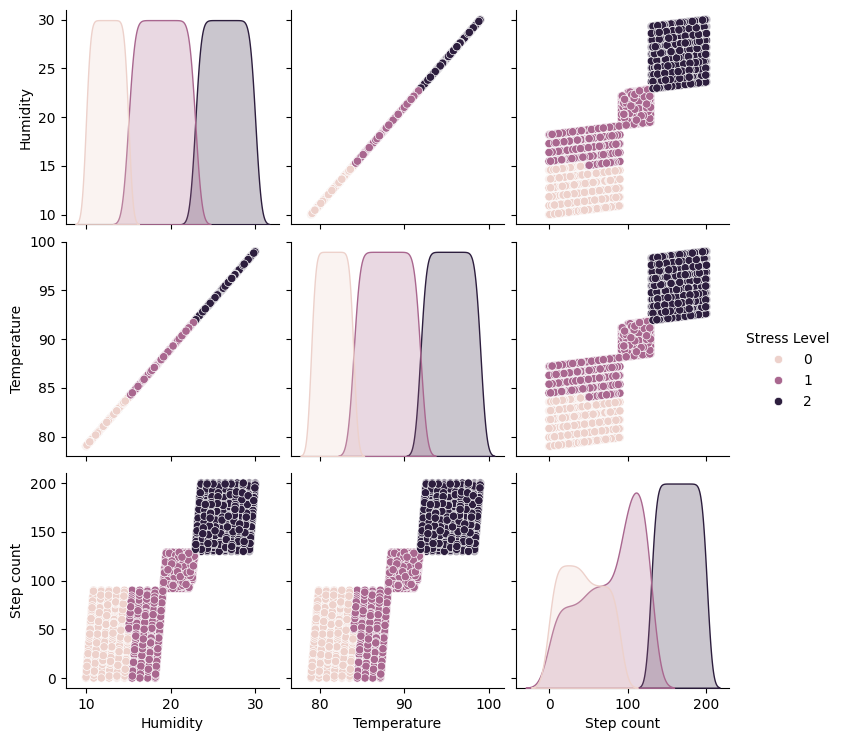

In [ ]:
sns.pairplot(numeric, hue='Stress Level')
plt.show()

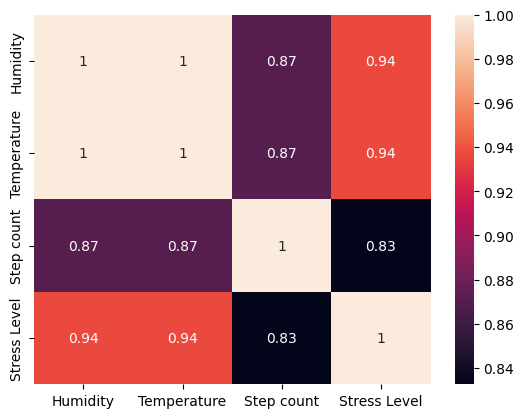

In [ ]:
sns.heatmap(numeric.corr(),annot = True)
plt.show()

#Data cleaning


In [ ]:
duplicate = df.duplicated()
clear = df.dropna()
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


#TRAIN TEST SPLIT

In [ ]:
x = df.drop('Stress Level',axis = 1)
y = df['Stress Level']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)


In [ ]:
x_train

,Humidity,Temperature,Step count
1695,27.74,96.74,187
744,25.27,94.27,153
1447,29.83,98.83,183
298,11.05,80.05,14
1349,28.89,97.89,160
...,...,...,...
1265,27.47,96.47,160
1277,18.56,87.56,37
1414,10.14,79.14,14
1691,13.93,82.93,29


In [ ]:
y_train

,Stress Level
1695,2
744,2
1447,2
298,0
1349,2
...,...
1265,2
1277,1
1414,0
1691,0


In [ ]:
x_test

,Humidity,Temperature,Step count
369,10.78,79.78,78
1438,28.85,97.85,156
520,13.36,82.36,63
905,24.30,93.30,198
1983,22.14,91.14,128
...,...,...,...
1857,18.96,87.96,77
114,25.78,94.78,133
22,14.43,83.43,79
1505,20.64,89.64,92


In [ ]:
y_test

,Stress Level
369,0
1438,2
520,0
905,2
1983,1
...,...
1857,1
114,2
22,0
1505,1


#DIFFERENT TYPE OF ALGORITHEM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

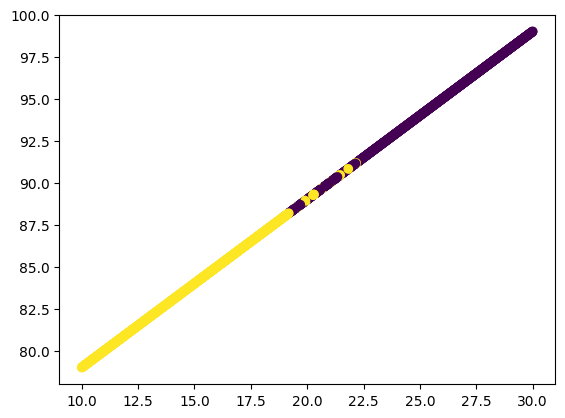

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(numeric)
labels = kmeans.predict(numeric)
plt.scatter(numeric['Humidity'], numeric['Temperature'], c=labels)
plt.show()

### 1.Linear regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

In [ ]:
y_true = y_test
y_pred = y_prediction
r2 = r2_score(y_true, y_pred)

print("R² score:", r2)

R² score: 1.0


### 2. logical regresssion

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
y_prediction

array([0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,

### 3. KNeighborsClassifier

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
y_prediction

array([0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,

### 4. DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
y_prediction

array([0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,

### 5. SVM

In [ ]:
# Train Model
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
y_pred


array([0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,

### 6. GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
y_pred

array([0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2,

In [ ]:
model_names = ['Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC', 'GaussianNB']
accuracies = [0.85, 0.92, 0.88, 0.90, 0.87]

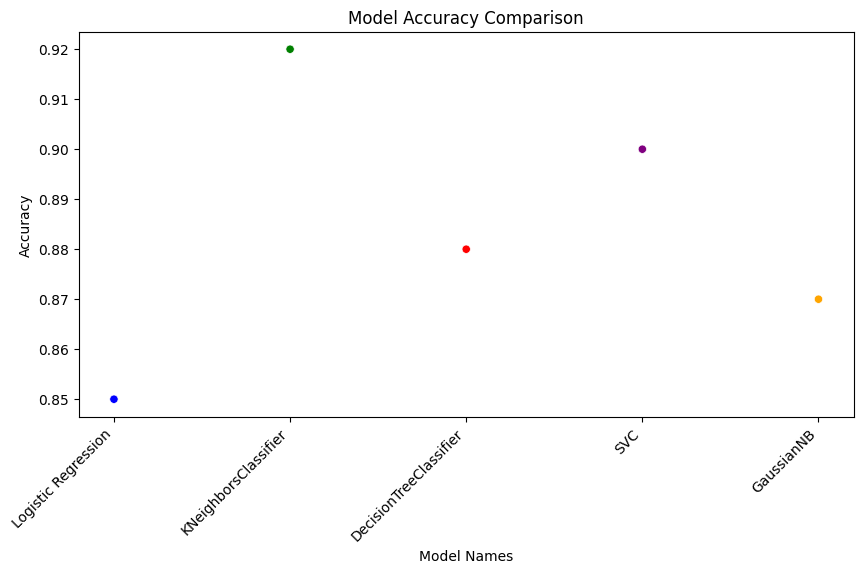

In [ ]:
plt.figure(figsize=(10, 5))
# The color list should have the same length as model_names and accuracies (5 elements)
sns.scatterplot(x=model_names, y=accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model Names")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.show()

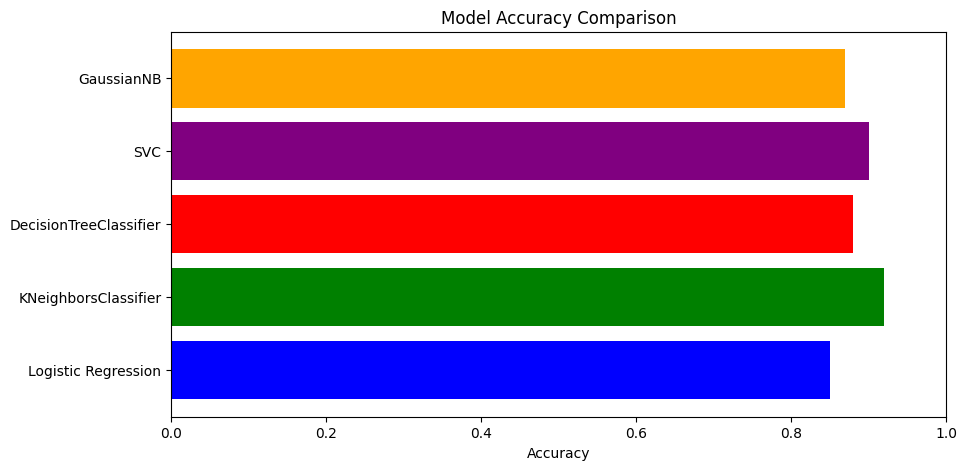

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()

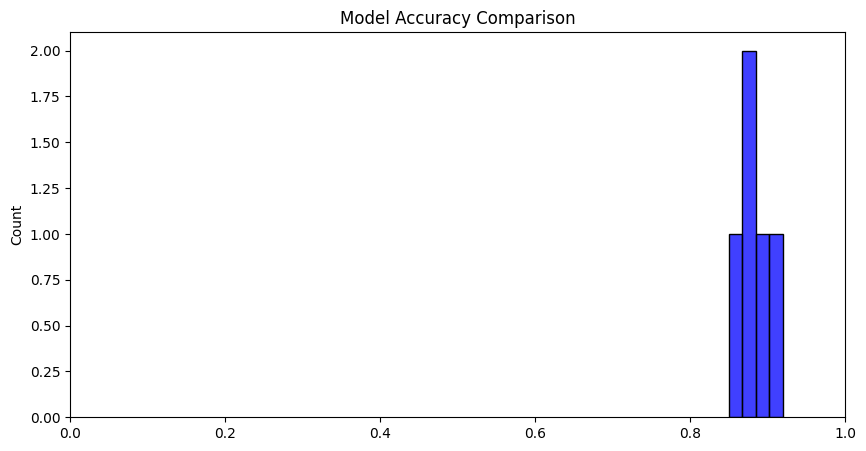

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=accuracies, color='blue')
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()

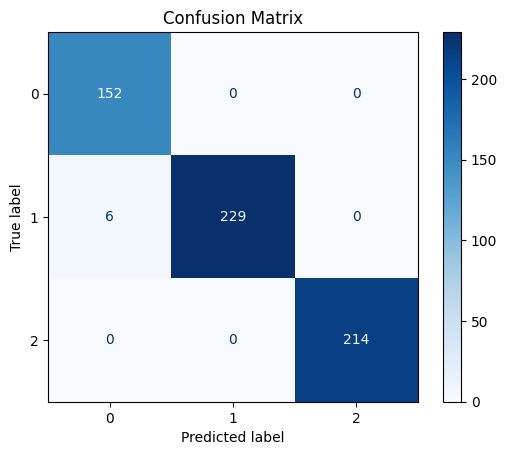

In [ ]:
target_names = ['0', '1']
# Get unique predicted labels
unique_predicted_labels = np.unique(y_pred)
# Ensure target_names covers all predicted labels
target_names = [str(label) for label in unique_predicted_labels]
# Update ConfusionMatrixDisplay with adjusted target_names
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()